### Importing libraries..

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, ParameterGrid
import seaborn as sns
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, roc_curve, auc
from sklearn.preprocessing import LabelBinarizer


### Loading the dataset..

In [2]:
excel_file_path = 'C:/Users/revat/Downloads/NLP_Tweets.xlsx'

In [3]:
sheet_name = 'Sheet1'

In [4]:
data = pd.read_excel(excel_file_path, sheet_name)

In [5]:
data.head()

,tweet,Mental health condition
0,Listen!! IM SORRY!! With her elder spirits g...,Depressed
1,Im so pissed and depressed at the same time,Depressed
2,"Iâ€™m just a hot mess thatâ€™s stressed, depre...",Depressed
3,Chen's probably depressed too since she's no l...,Depressed
4,"Do you like it when I shake it for ya, daddy? ...",Depressed


In [6]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\revat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\revat\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
nltk.download('wordnet')  # Download WordNet data

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\revat\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Preprocessing...

In [8]:
data = data.drop_duplicates()
#Removing duplicates

In [9]:
data['tweet'] = data['tweet'].str.lower()
#converting to lowercase

In [10]:
#Remove special characters, URLs, mentions, and hashtags
def clean_text(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)
    # Remove mentions (e.g., @username)
    tweet = re.sub(r'@\w+', '', tweet)
    # Remove hashtags
    tweet = re.sub(r'#\w+', '', tweet)
    # Remove special characters and numbers (retain only letters)
    tweet = re.sub(r'[^a-zA-Z\s]', '', tweet)
    return tweet

In [11]:
data = data.dropna(subset=['tweet'])
#Removing rows with no tweets

In [12]:
data['tweet'] = data['tweet'].apply(clean_text)


In [13]:
#Tokenization and removing stopwords
stop_words = set(stopwords.words('english'))

In [14]:
def tokenize_and_remove_stopwords(tweet):
    tokens = word_tokenize(tweet)
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

In [15]:
data['tweet'] = data['tweet'].apply(tokenize_and_remove_stopwords)


In [16]:
#Lemmatization
lemmatizer = WordNetLemmatizer()

In [17]:
def lemmatize_text(tweet):
    words = word_tokenize(tweet)
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

In [18]:
import nltk
nltk.download('omw')

[nltk_data] Downloading package omw to
[nltk_data]     C:\Users\revat\AppData\Roaming\nltk_data...
[nltk_data]   Package omw is already up-to-date!


True

In [19]:
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\revat\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [20]:
data['tweet'] = data['tweet'].apply(lemmatize_text)


In [21]:
data.head()

,tweet,Mental health condition
0,listen im sorry elder spirit gone didnt make s...,Depressed
1,im pissed depressed time,Depressed
2,im hot mess thats stressed depressed poorly dr...,Depressed
3,chen probably depressed since shes longer shik...,Depressed
4,like shake ya daddy move around let get peep t...,Depressed


In [22]:
pip install wordcloud


Note: you may need to restart the kernel to use updated packages.


In [23]:
from wordcloud import WordCloud


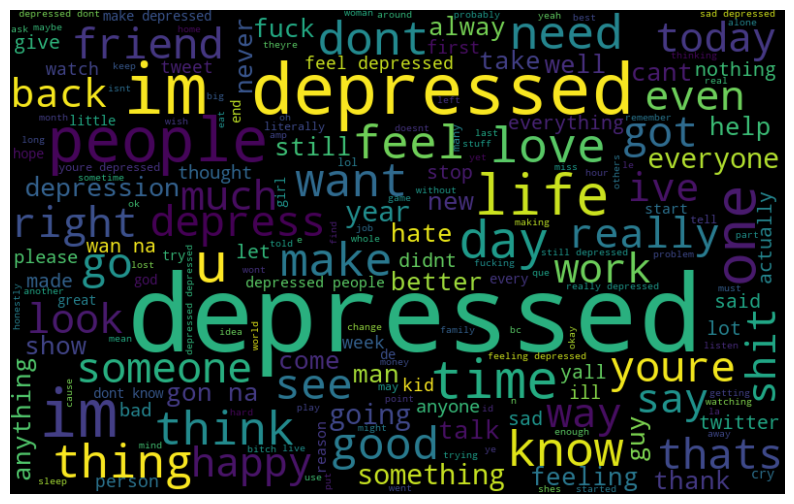

In [24]:
all_words = ' '.join([text for text in data['tweet']])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [25]:
tokenized_tweets = [word_tokenize(tweet) for tweet in data['tweet']]

In [26]:
all_words = [word for tweet_words in tokenized_tweets for word in tweet_words]

In [27]:
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in all_words if word.lower() not in stop_words]

In [28]:
word_counts = Counter(filtered_words)

In [29]:
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Frequency'])

In [30]:
word_counts_df = word_counts_df.sort_values(by='Frequency', ascending=False)

In [31]:
word_counts_df = word_counts_df.reset_index(drop=True)

In [32]:
print(word_counts_df.head(20)) 


         Word  Frequency
0   depressed      12400
1          im       4957
2        like       2307
3         get       1946
4        dont       1918
5      people       1712
6        feel       1377
7        time       1367
8        make       1285
9         one       1222
10       life       1219
11       know       1162
12        day       1094
13          u       1050
14       want       1041
15     really        970
16         na        921
17      think        867
18         go        852
19      youre        842


In [33]:
word_counts.most_common(20)

[('depressed', 12400),
 ('im', 4957),
 ('like', 2307),
 ('get', 1946),
 ('dont', 1918),
 ('people', 1712),
 ('feel', 1377),
 ('time', 1367),
 ('make', 1285),
 ('one', 1222),
 ('life', 1219),
 ('know', 1162),
 ('day', 1094),
 ('u', 1050),
 ('want', 1041),
 ('really', 970),
 ('na', 921),
 ('think', 867),
 ('go', 852),
 ('youre', 842)]

In [34]:
most_found_words = pd.DataFrame(word_counts.most_common(20),
                             columns=['Word', 'Frequency'])

most_found_words.head()

,Word,Frequency
0,depressed,12400
1,im,4957
2,like,2307
3,get,1946
4,dont,1918


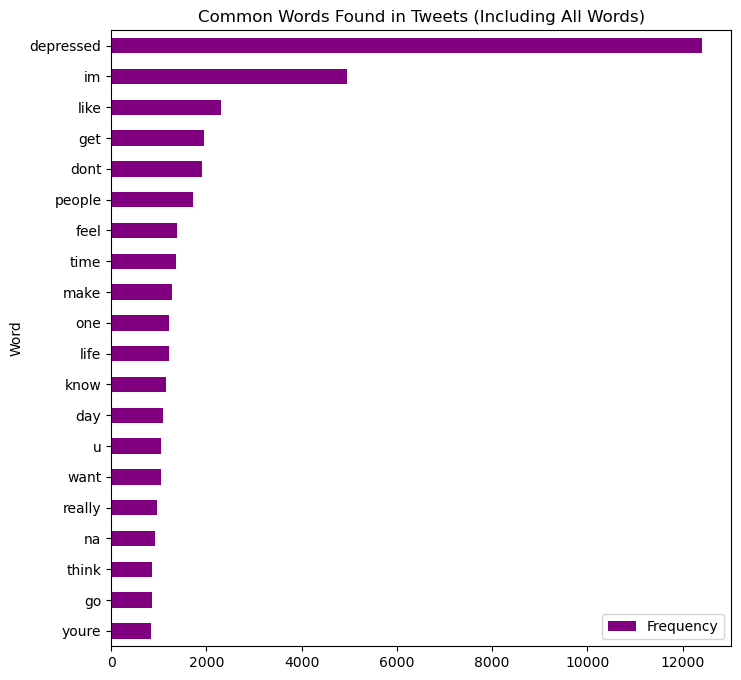

In [35]:
fig, ax = plt.subplots(figsize=(8, 8))

# Plot horizontal bar graph
most_found_words.sort_values(by='Frequency').plot.barh(x='Word',
                      y='Frequency',
                      ax=ax,
                      color="purple")

ax.set_title("Common Words Found in Tweets (Including All Words)")

plt.show()

In [36]:
#will remove some words which doesn't make sense

In [37]:
unwanted_words=['one','go','im','u','na']

In [38]:
sorted_words=most_found_words.sort_values(by='Frequency',ascending=False)

In [39]:
filtered_most_used_words = [word for word in sorted_words['Word'] if word not in unwanted_words]

In [40]:
filtered_most_used_words_count= Counter(filtered_most_used_words)

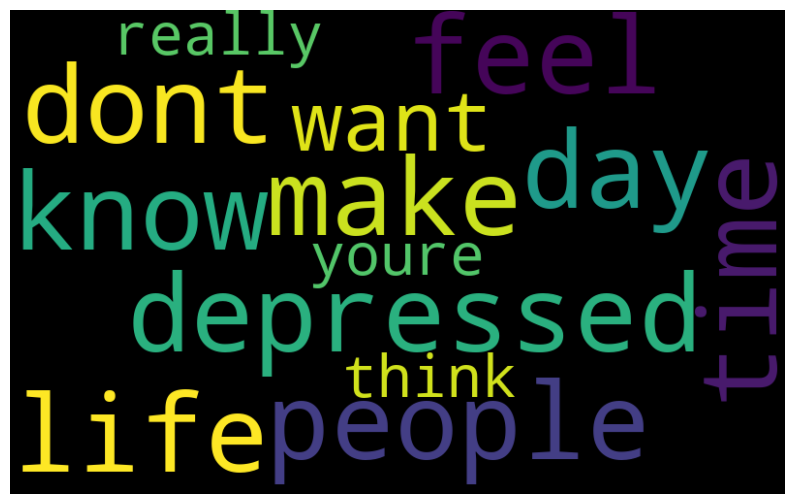

In [41]:
all_words = ' '.join([text for text in filtered_most_used_words])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

In [42]:
filtered_most_found_words = pd.DataFrame(filtered_most_used_words_count.most_common(20),
                             columns=['Word', 'Frequency'])


In [43]:
filtered_most_found_words

,Word,Frequency
0,depressed,1
1,like,1
2,get,1
3,dont,1
4,people,1
5,feel,1
6,time,1
7,make,1
8,life,1
9,know,1


In [44]:
sorted_words


,Word,Frequency
0,depressed,12400
1,im,4957
2,like,2307
3,get,1946
4,dont,1918
5,people,1712
6,feel,1377
7,time,1367
8,make,1285
9,one,1222


### Model building

In [45]:
# Split the dataset into features (X) and labels (y)
X = data['tweet']
y = data['Mental health condition']

In [46]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
# Initialize TF-IDF vectorizer
vectorizer_tfidf = TfidfVectorizer(max_features=5000)

In [48]:
# Transform text data into TF-IDF features
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)

In [49]:
y_train_tfidf = vectorizer_tfidf.fit_transform(y_train)
y_test_tfidf = vectorizer_tfidf.transform(y_test)

### Naive Bayes Classifier

In [50]:
# Initialize a Multinomial Naive Bayes classifier
classifier_naive_bayes = MultinomialNB()

In [51]:
# Train the classifier on the training data
classifier_naive_bayes.fit(X_train_tfidf, y_train)

MultinomialNB()

In [52]:
# Predict the labels for the test data
y_pred_naive_bayes = classifier_naive_bayes.predict(X_test_tfidf)

In [53]:
# Evaluate the model
accuracy_naive_bayes = accuracy_score(y_test, y_pred_naive_bayes)
report_naive_bayes = classification_report(y_test, y_pred_naive_bayes)

In [54]:
print(f"Accuracy: {accuracy_naive_bayes:.2f}")
print("Classification Report:\n", report_naive_bayes)

Accuracy: 0.88
Classification Report:
                precision    recall  f1-score   support

    Depressed       0.87      1.00      0.93      4113
Non-Depressed       0.95      0.36      0.52       923

     accuracy                           0.88      5036
    macro avg       0.91      0.68      0.73      5036
 weighted avg       0.89      0.88      0.86      5036



In [55]:
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)

In [56]:
label_encoder = LabelEncoder()
y_pred_encoded = label_encoder.fit_transform(y_pred_naive_bayes)

In [57]:
mse_naive_bayes = mean_squared_error(y_test_encoded, y_pred_encoded)
print(f"Mean Squared Error: {mse_naive_bayes:.2f}")

Mean Squared Error: 0.12


### Logistic Regression Classifier

In [58]:
model_log = LogisticRegression()
model_log.fit(X_train_tfidf, y_train)

LogisticRegression()

In [59]:
y_pred_log = model_log.predict(X_test_tfidf)

In [60]:
# Evaluate the model
accuracy_log = accuracy_score(y_test, y_pred_log)
print(f"Accuracy: {accuracy_log:.2f}")
print(classification_report(y_test, y_pred_log))

Accuracy: 0.91
               precision    recall  f1-score   support

    Depressed       0.91      0.99      0.95      4113
Non-Depressed       0.91      0.55      0.68       923

     accuracy                           0.91      5036
    macro avg       0.91      0.77      0.81      5036
 weighted avg       0.91      0.91      0.90      5036



In [61]:
label_encoder = LabelEncoder()
y_pred_encoded_log = label_encoder.fit_transform(y_pred_log)

In [62]:
mse_log = mean_squared_error(y_test_encoded, y_pred_encoded_log)
print(f"Mean Squared Error: {mse_log:.2f}")

Mean Squared Error: 0.09


### SVM classifier

In [63]:
svm_classifier = SVC(probability=True,kernel='linear')  
svm_classifier.fit(X_train_tfidf, y_train)

SVC(kernel='linear', probability=True)

In [64]:
y_pred_svm = svm_classifier.predict(X_test_tfidf)

In [65]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy: {accuracy_svm:.2f}")
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.91
               precision    recall  f1-score   support

    Depressed       0.93      0.97      0.95      4113
Non-Depressed       0.83      0.65      0.73       923

     accuracy                           0.91      5036
    macro avg       0.88      0.81      0.84      5036
 weighted avg       0.91      0.91      0.91      5036



In [123]:
accuracy_score = {'Classification models': ['Naive Bayes Classifier', 'Logistic Regression Classifier', 'SVM Classifier'],
                      'Accuracy' : [accuracy_naive_bayes,accuracy_log,accuracy_svm]}

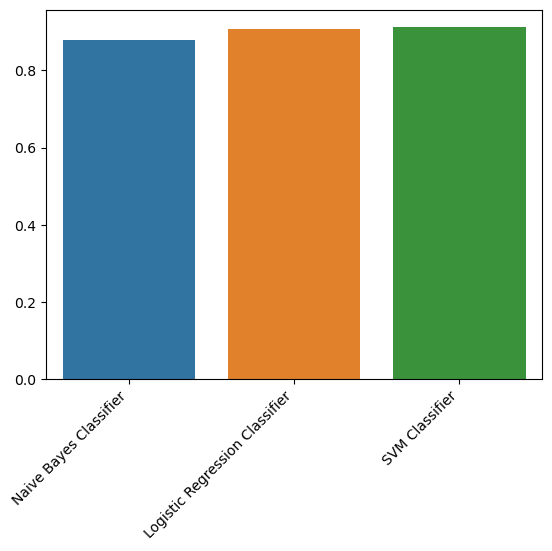

In [124]:
sns.barplot(data=accuracy_score, x='Classification models',y = 'Accuracy')
plt.xticks(rotation=45, ha='right');

In [66]:
label_encoder = LabelEncoder()
y_pred_encoded_svm = label_encoder.fit_transform(y_pred_svm)

In [67]:
mse_svm = mean_squared_error(y_test_encoded, y_pred_encoded_svm)
print(f"Mean Squared Error: {mse_svm:.2f}")

Mean Squared Error: 0.09


### Cross validation

In [68]:
scorer = make_scorer(accuracy_score)


In [69]:
# Performing 5-fold cross-validation- naive bayes
cross_val_scores = cross_val_score(classifier_naive_bayes, X_train_tfidf, y_train, cv=5, scoring=scorer)

In [70]:
print("Cross-Validation Scores:", cross_val_scores)

Cross-Validation Scores: [0.87763713 0.87540333 0.86671631 0.87168032 0.87636544]


In [71]:
# Performing 5-fold cross-validation- logistic regression
cross_val_scores_log = cross_val_score(model_log, X_train_tfidf, y_train, cv=5, scoring=scorer)

In [72]:
cross_val_scores_log

array([0.90295359, 0.89302556, 0.89625217, 0.89898238, 0.90044687])

In [73]:
# Performing 5-fold cross-validation- SVM regression
cross_val_scores_svm = cross_val_score(svm_classifier, X_train_tfidf, y_train, cv=5, scoring=scorer)

In [74]:
cross_val_scores_svm

array([0.91213701, 0.9099032 , 0.9074212 , 0.9103996 , 0.91434955])

### Gridsearch for Naive bayes

In [75]:
param_grid = {
 
    'alpha': [0.1, 0.5, 1.0, 1.5, 2.0] 

}

In [76]:
grid_search_naive_bayes = GridSearchCV(classifier_naive_bayes, param_grid, cv=5)

In [77]:
grid_search_naive_bayes.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5, estimator=MultinomialNB(),
             param_grid={'alpha': [0.1, 0.5, 1.0, 1.5, 2.0]})

In [78]:
print("Best cross-validation score: {:.2f}".format(grid_search_naive_bayes.best_score_))

Best cross-validation score: 0.89


In [79]:
gs_naive_bayes= grid_search_naive_bayes.best_score_

### Gridsearch for Logistic regression Classifier

In [80]:
param_grid = {
    'penalty': ['l1', 'l2'], 
    'C': [0.1, 1.0, 10.0] 
}

In [81]:
grid_search_logistic = GridSearchCV(model_log, param_grid, cv=5)

In [82]:
grid_search_logistic.fit(X_train_tfidf, y_train)

C:\Users\revat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\revat\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 10.0], 'penalty': ['l1', 'l2']})

In [83]:
print("Best cross-validation score: {:.2f}".format(grid_search_logistic.best_score_))

Best cross-validation score: 0.91


In [84]:
gs_logistic=grid_search_logistic.best_score_

### Gridsearch for SVM Classifier

In [85]:
param_grid = {
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 
    'C': [0.1, 1.0, 10.0]  
}

In [86]:
grid_search_svm = GridSearchCV(svm_classifier, param_grid, cv=5)


In [87]:
X_train_sample, X_test_sample, y_train_sample, y_test_sample = train_test_split(X_train_tfidf, y_train, test_size=0.9, random_state=42)
#taking sample of the train data

In [88]:
grid_search_svm.fit(X_train_sample, y_train_sample)


GridSearchCV(cv=5, estimator=SVC(kernel='linear', probability=True),
             param_grid={'C': [0.1, 1.0, 10.0],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [89]:
print("Best cross-validation score: {:.2f}".format(grid_search_svm.best_score_))

Best cross-validation score: 0.86


In [90]:
gs_svm=grid_search_svm.best_score_

In [91]:
grid_search_scores = {'Classification models': ['Naive Bayes Classifier', 'Logistic Regression Classifier', 'SVM Classifier'],
                      'Best scores with parameters' : [gs_naive_bayes,gs_logistic,gs_svm]}

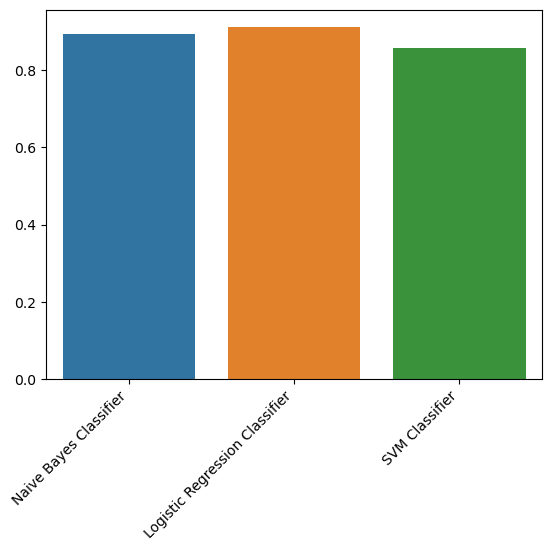

In [92]:
sns.barplot(data=grid_search_scores, x='Classification models',y = 'Best scores with parameters')
plt.xticks(rotation=45, ha='right');

In [93]:
# Define class labels
class_labels = ["Depressed", "Non-Depressed"]

In [94]:
# Define precision, recall, and F1-score values for both classes
precision = [0.93, 0.83]
recall = [0.97, 0.65]
f1_score = [0.95, 0.73]


In [95]:
# Create a DataFrame
data = pd.DataFrame({'Precision': precision, 'Recall': recall, 'F1-Score': f1_score}, index=class_labels)


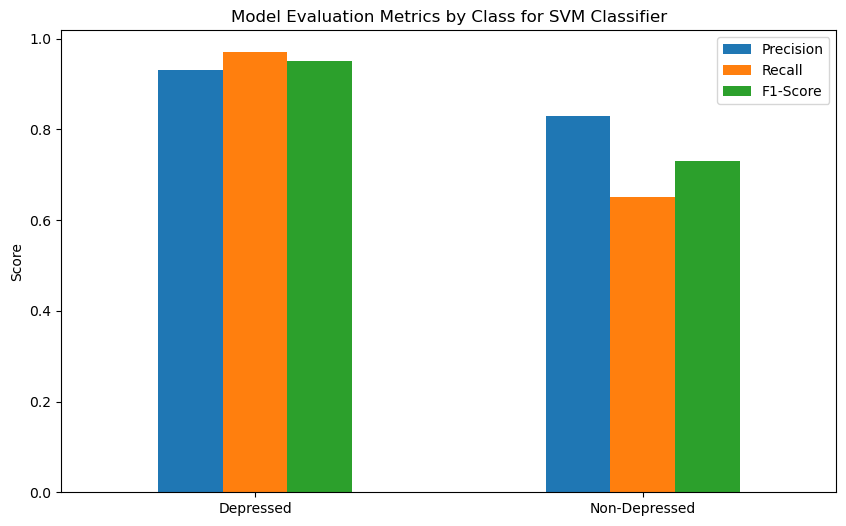

In [96]:
# Plot the grouped bar chart
ax = data.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics by Class for SVM Classifier')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')

In [97]:
#For Logistic regression classifier

In [98]:
# Define precision, recall, and F1-score values for both classes
precision_log = [0.91, 0.91]
recall_log = [0.99, 0.55]
f1_score_log = [0.95, 0.68]

In [99]:
# Create a DataFrame
data_log = pd.DataFrame({'Precision': precision_log, 'Recall': recall_log, 'F1-Score': f1_score_log}, index=class_labels)


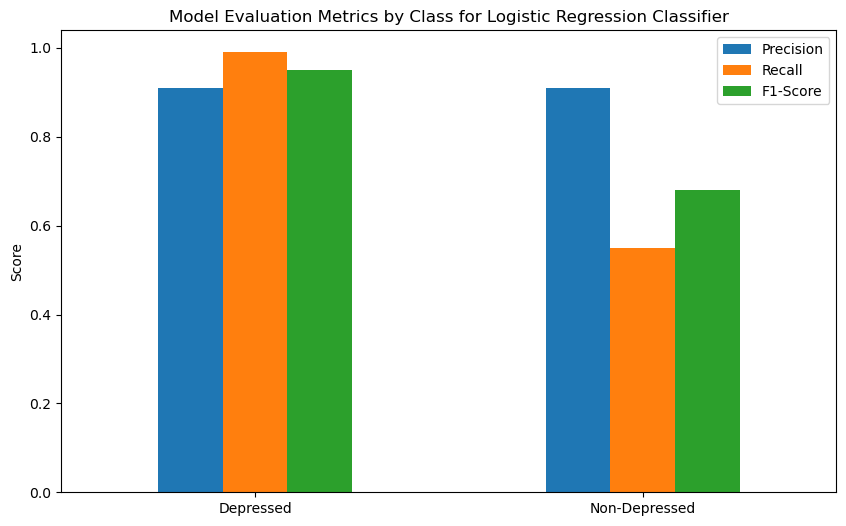

In [100]:
# Plot the grouped bar chart
ax = data_log.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics by Class for Logistic Regression Classifier')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')

In [101]:
#For naive bayes classifier

In [102]:
# Define precision, recall, and F1-score values for both classes
precision_nb = [0.87, 0.95]
recall_nb = [1, 0.36]
f1_score_nb = [0.93, 0.52]

In [103]:
# Create a DataFrame
data_nb = pd.DataFrame({'Precision': precision_nb, 'Recall': recall_nb, 'F1-Score': f1_score_nb}, index=class_labels)


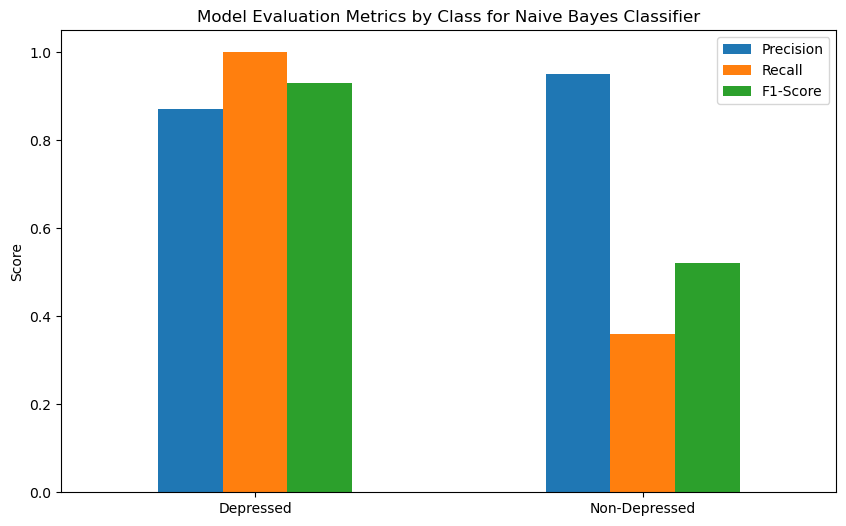

In [104]:
# Plot the grouped bar chart
ax = data_nb.plot(kind='bar', figsize=(10, 6))
plt.title('Model Evaluation Metrics by Class for Naive Bayes Classifier')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.legend(loc='upper right')

### Confusion matrix for Logistic Regression Classifier

In [105]:
conf_matrix = confusion_matrix(y_test, y_pred_log)

In [106]:
# Extract values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

In [107]:
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[4061   52]
 [ 419  504]]


Text(0.5, 1.0, 'Confusion Matrix for Logistic Regression Claasifier')

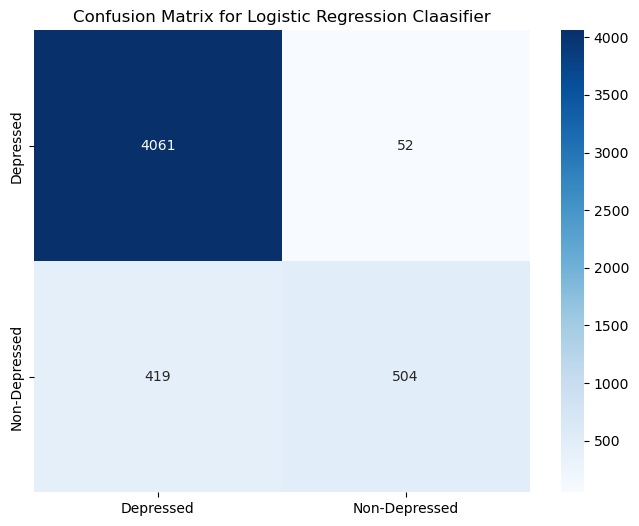

In [108]:
# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for Logistic Regression Claasifier")


### Confusion matrix for SVM Classifier

In [109]:
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)

Text(0.5, 1.0, 'Confusion Matrix for SVM Classifier')

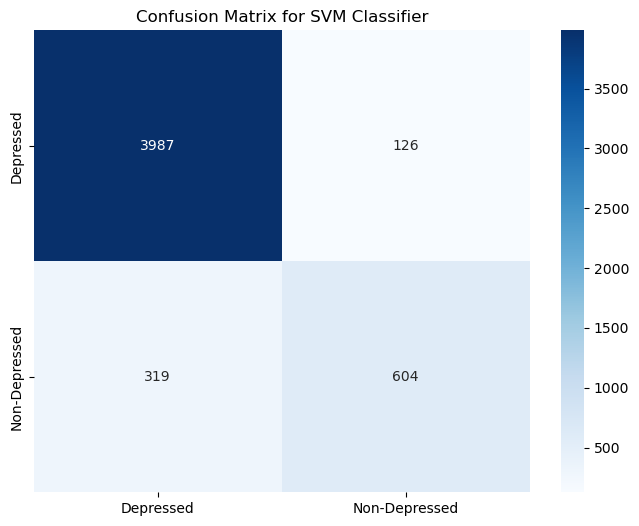

In [110]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for SVM Classifier")

### Confusion matrix for Naive bayes Classifier

In [111]:
conf_matrix_nb = confusion_matrix(y_test, y_pred_naive_bayes)

Text(0.5, 1.0, 'Confusion Matrix for Naive Bayes Classifier')

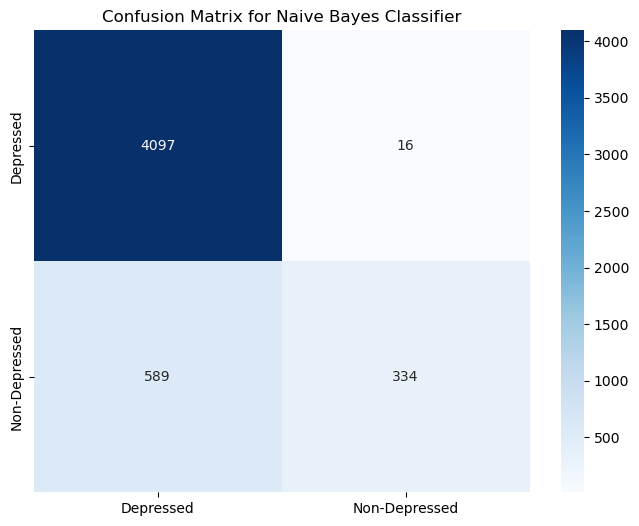

In [112]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_nb, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.title("Confusion Matrix for Naive Bayes Classifier")

### Ensemble method: Building Voting Regressor

In [113]:
ensembled = [ classifier_naive_bayes, model_log, svm_classifier ]

In [114]:
voting_classifier = VotingClassifier(estimators=[('naive bayes', classifier_naive_bayes), ('logistic regression', model_log), ('SVM', svm_classifier)], voting='soft')


In [115]:
voting_classifier.fit(X_train_tfidf, y_train)

VotingClassifier(estimators=[('naive bayes', MultinomialNB()),
                             ('logistic regression', LogisticRegression()),
                             ('SVM', SVC(kernel='linear', probability=True))],
                 voting='soft')

In [116]:
ensemble_predictions = voting_classifier.predict(X_test_tfidf)

In [117]:
accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Model Accuracy: {:.2f}".format(accuracy))

Ensemble Model Accuracy: 0.91


### Creating ROC curves and AUC

In [118]:
# Encode the labels as binary (0 and 1)
lb = LabelBinarizer()
y_train_binary = lb.fit_transform(y_train)
y_test_binary = lb.transform(y_test)

In [119]:
y_score = voting_classifier.predict_proba(X_test_tfidf)[:, 1] 
fpr, tpr, _ = roc_curve(y_test_binary, y_score)
roc_auc = auc(fpr, tpr)

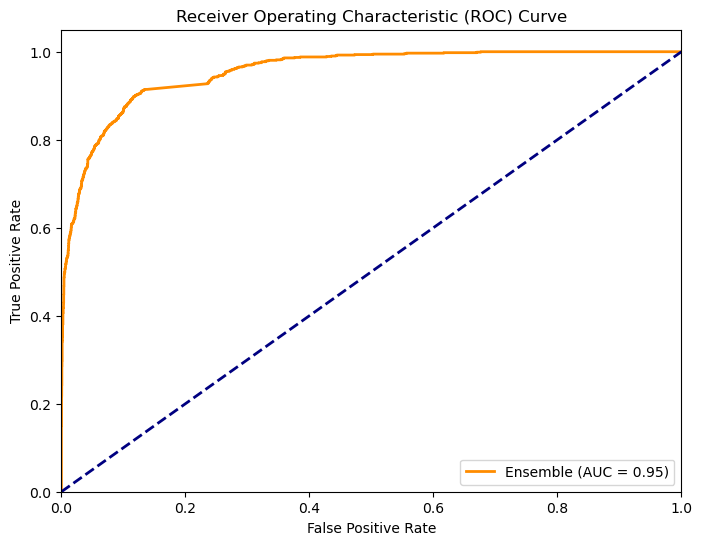

In [120]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Ensemble (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()